<a href="https://colab.research.google.com/github/nehakhatoon/CODSOFT/blob/main/CodSoft_NEHA_%7C_TASK_2_CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
NEHA_uploaded = files.upload()

Saving NEHA_Churn_PREDICTION.xls to NEHA_Churn_PREDICTION.xls


#NEHA_Churn_PREDICTION.xls to NEHA_Churn_PREDICTION.xls

In [7]:
NEHA_filename= list(NEHA_uploaded.keys())[0]

In [8]:
import pandas as pd
df=pd.read_excel(NEHA_uploaded[NEHA_filename])
df.head()

<ipython-input-8-8651bd7e797b>:2: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df=pd.read_excel(NEHA_uploaded[NEHA_filename])


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


NEHA Model: NEHA Logistic Regression
NEHA Accuracy: 0.8080
NEHA Precision: 0.5891
NEHA Recall: 0.1867
NEHA F1 Score: 0.2836

NEHA Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

NEHA Model: NEHA Random Forest
NEHA Accuracy: 0.8615
NEHA Precision: 0.7708
NEHA Recall: 0.4545
NEHA F1 Score: 0.5719

NEHA Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

NEHA Model: NEHA Gradient Boosting
NEHA Accu

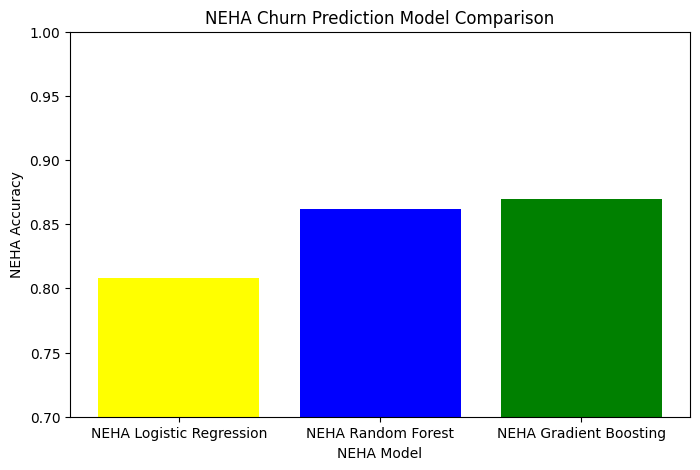

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# NEHA Encode categorical variables
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  #NEHA  Male: 1, Female: 0
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)  #NEHA  One-hot encoding for Geography

# NEHA Separate features and target variable
X = df.drop(columns=["Exited"])
y = df["Exited"]

# NEHA Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# NEHA Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# NEHA Function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"NEHA Model: {model_name}")
    print(f"NEHA Accuracy: {accuracy:.4f}")
    print(f"NEHA Precision: {precision:.4f}")
    print(f"NEHA Recall: {recall:.4f}")
    print(f"NEHA F1 Score: {f1:.4f}")
    print("\nNEHA Classification Report:\n", classification_report(y_test, y_pred))
    print("=" * 50)
    return accuracy

# NEHA Train models
models = {
    "NEHA Logistic Regression": LogisticRegression(),
    "NEHA Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "NEHA Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# NEHA Store results
results = {}

for model_name, model in models.items():
    results[model_name] = train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name)

# NEHA Compare Model Performance
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['yellow', 'blue', 'green'])
plt.xlabel("NEHA Model")
plt.ylabel("NEHA Accuracy")
plt.title("NEHA Churn Prediction Model Comparison")
plt.ylim(0.7, 1.0)
plt.show()